['.~lock.Test.csv#', 'trainMod.csv', 'testMod.csv', 'Test.csv', 'bigmart-sales-data.zip', 'Train.csv', '.ipynb_checkpoints', 'musicGen.py', 'Dsci.ipynb', '.git', 'iris.py', 'BigMart.py', 'WineReviews']
(8523, 13) (5681, 13) (14204, 13)
Skewness: 1.544684
Kurtsis: 2.419439

Item_Identifier column: 
FDW32    10
NCJ19    10
FDL39    10
FDT11    10
FDQ12    10
FDH48    10
FDS08    10
FDO10    10
FDA28    10
FDT12    10
FDY31    10
NCI54    10
FDE26    10
FDJ41    10
FDB41    10
DRK13    10
FDX31    10
FDF21    10
FDH57    10
FDY03    10
FDX36    10
DRK59    10
FDM12    10
DRE15    10
FDR02    10
FDB20    10
FDL46    10
FDT25    10
FDJ26    10
FDZ40    10
         ..
FDQ22     8
FDU16     8
NCR41     8
FDY44     8
NCR50     8
FDQ55     8
FDJ40     8
FDK60     8
NCS18     8
NCF07     8
NCL54     8
FDE58     8
NCR17     8
FDV11     8
FDT26     8
FDD34     8
FDL08     8
FDX49     7
NCW54     7
FDO33     7
FDI46     7
FDM50     7
FDM52     7
FDS22     7
FDM10     7
DRN11     7
FDR51     7
NCL42

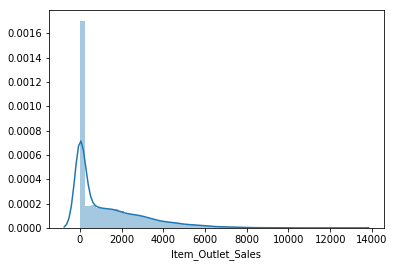

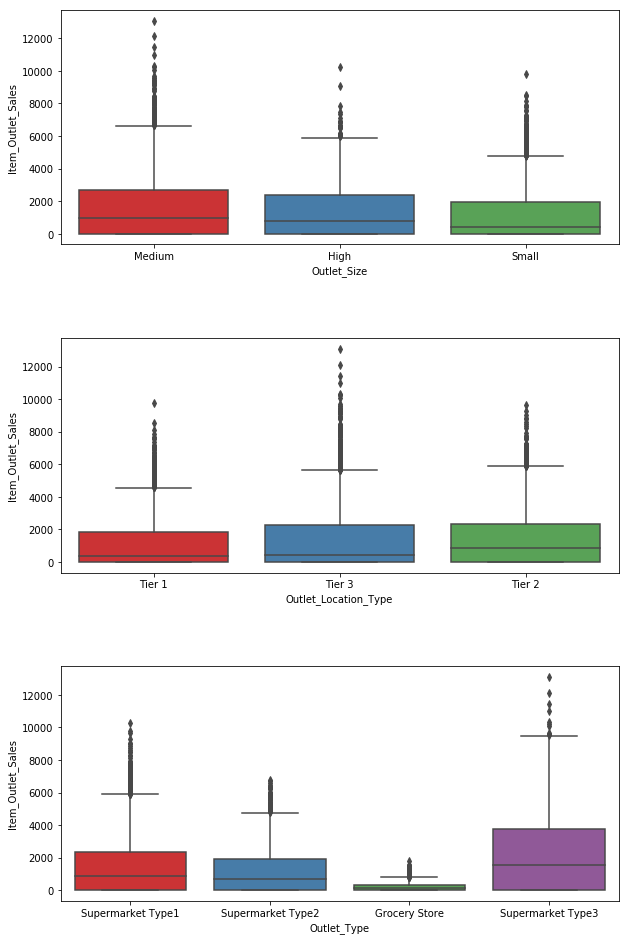

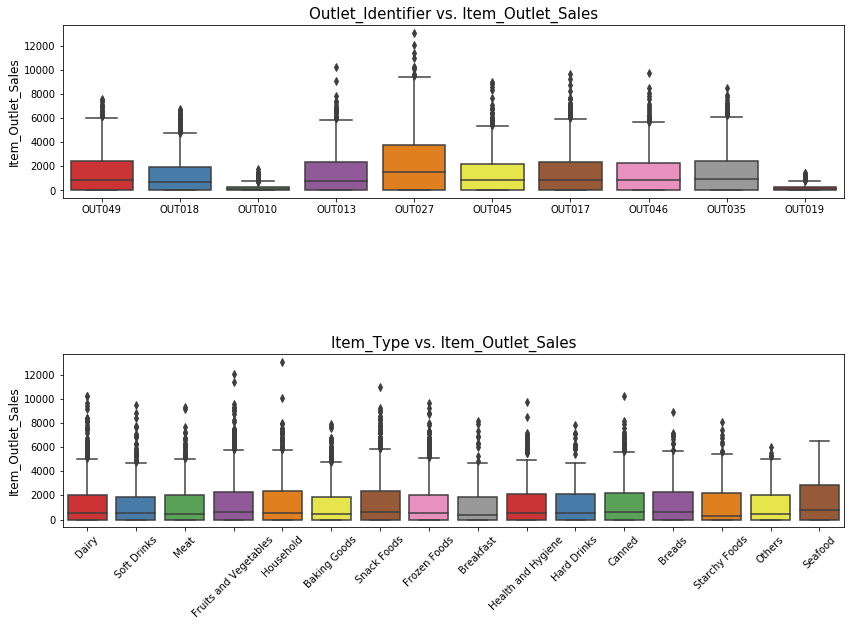

Missing values: 2439
Missing values after immputation 0
Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size           nan             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016
0
Number of 0 values initially: 879
Number of 0 values after modification: 0
Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


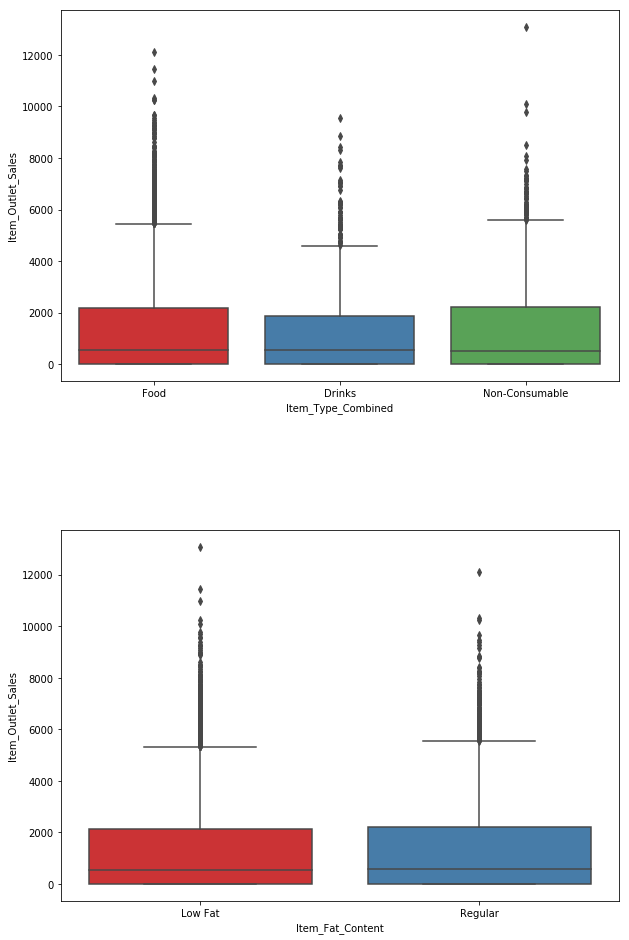

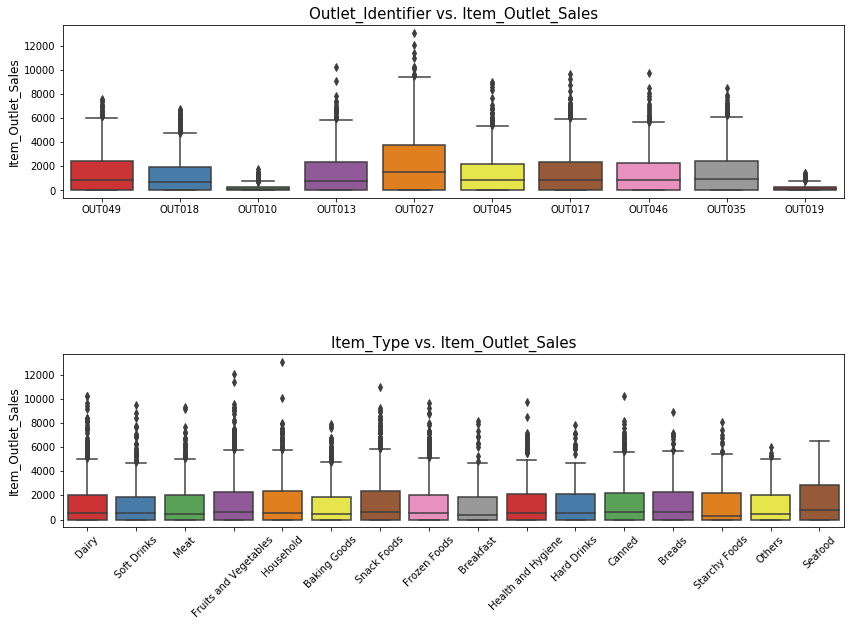

'\ndata.index = data[\'Outlet_Establishment_Year\']\ndata.index\n\ndf = data.loc[:,[\'Item_Outlet_Sales\']]\ndf.head(2)\n\ndata.groupby(\'Outlet_Establishment_Year\')[\'Item_Outlet_Sales\'].mean().plot.bar()\n\ndata[\'Outlet_Years\'] = 2009 - data[\'Outlet_Establishment_Year\']\ndata[\'Outlet_Years\'].describe()\n\ndata.index = data[\'Outlet_Establishment_Year\']\ndf = data.loc[:,[\'Item_Outlet_Sales\']]\nts = df[\'Item_Outlet_Sales\']\nplt.figure(figsize = (12, 8))\nplt.plot(ts, label= \'Item_Outlet_Sales\')\nplt.title(\'Outet_Establishment_Year\')\nplt.xlabel(\'Time(Year-Month)\')\nplt.ylabel(\'Item_Outlet_Sales\')\nplt.legend(loc = \'best\')\nplt.show()\n\ntemp_data = data.loc[data[\'Outlet_Establishment_Year\'] == 1998]\ntemp_data[\'Outlet_Type\'].value_counts()\n\ntest_temp_data= test.loc[test[\'Outlet_Establishment_Year\'] == 1998]\ntest_temp_data[\'Outlet_Type\'].value_counts()\n\n\nfrom sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\n\ndata[\'Outlet\'] = le.fi

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import os
print(os.listdir("../MLRandom"))

train = pd.read_csv('../MLRandom/Train.csv')
test = pd.read_csv('../MLRandom/Test.csv')

#Rows*Columns
train.shape, test.shape 

# Shows the Cols of each
train.columns
test.columns


train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)


data['Item_Outlet_Sales'].describe()

sns.distplot(data['Item_Outlet_Sales'])


print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())


data.dtypes

# Prints the data in string format

categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

#Prints the data in Numerical format

numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)



data['Outlet_Establishment_Year'].value_counts()

# Printing all the null values

data.apply(lambda x: sum(x.isnull()))

data.apply(lambda x : len(x.unique()))

for col in categorial_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())

#BOX PLOT
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()


plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

missing_values = data['Item_Weight'].isnull()
print('Missing values: %d' %sum(missing_values))

data.loc[missing_values,'Item_Weight']  = data.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
print('Missing values after immputation %d' %sum(data['Item_Weight'].isnull()))

from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x.astype('str')).mode[0]))
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)


#Get a boolean variable specifying missing Item_Weight values
missing_values = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(missing_values))
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print (sum(data['Outlet_Size'].isnull()))


#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())


plt.figure(figsize = (10,9))

plt.subplot(211)
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()
data.index = data['Outlet_Establishment_Year']
data.index

df = data.loc[:,['Item_Outlet_Sales']]
df.head(2)

data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

data['Outlet_Years'] = 2009 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

data.index = data['Outlet_Establishment_Year']
df = data.loc[:,['Item_Outlet_Sales']]
ts = df['Item_Outlet_Sales']
plt.figure(figsize = (12, 8))
plt.plot(ts, label= 'Item_Outlet_Sales')
plt.title('Outet_Establishment_Year')
plt.xlabel('Time(Year-Month)')
plt.ylabel('Item_Outlet_Sales')
plt.legend(loc = 'best')
plt.show()

temp_data = data.loc[data['Outlet_Establishment_Year'] == 1998]
temp_data['Outlet_Type'].value_counts()

test_temp_data= test.loc[test['Outlet_Establishment_Year'] == 1998]
test_temp_data['Outlet_Type'].value_counts()


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type', 'Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

data = pd.get_dummies(data , columns = ['Item_Fat_Content','Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type','Item_Type_Combined', 'Outlet'])
data.dtypes

data.drop(['Item_Type','Outlet_Establishment_Year'], axis = 1, inplace = True)

train= data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

test.drop(['Item_Outlet_Sales','source'], axis = 1, inplace = True)
train.drop(['source'],axis = 1, inplace = True)

train.to_csv('trainMod.csv', index = False)
test.to_csv("testMod.csv", index = False)
